# Explore here

In [10]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [11]:
import spotipy as sp
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret))

In [15]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Bad Bunny id
artist_id = 'spotify:artist:4q3ewBCX7sLwd24euuV69X'

# Track filter
top_tracks = sp.artist_top_tracks("4q3ewBCX7sLwd24euuV69X", country='Spain')

# Top 10 track filter
for idx, track in enumerate(top_tracks['tracks'][:10]):
    print(f"{idx + 1}. {track['name']} - {track['popularity']} popularity")

1. PERRO NEGRO - 85 popularity
2. un x100to - 80 popularity
3. ADIVINO - 75 popularity
4. LA CANCIÓN - 83 popularity
5. Me Porto Bonito - 82 popularity
6. Ojitos Lindos - 81 popularity
7. DÁKITI - 76 popularity
8. Tití Me Preguntó - 80 popularity
9. Efecto - 80 popularity
10. Moscow Mule - 80 popularity


In [30]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Track name and popularity and create a dictionary
tracks_data = {
    'track_name': [track['name'] for track in top_tracks['tracks'][:10]],
    'popularity': [track['popularity'] for track in top_tracks['tracks'][:10]]
}

# Convert dictionary to Pandas DataFrame
df_tracks = pd.DataFrame(tracks_data)

# Sort DataFrame by popularity (descending order)
df_sorted = df_tracks.sort_values(by='popularity', ascending=False)

# Top 3 most popular songs
print(df_sorted.head(3))

        track_name  popularity
0      PERRO NEGRO          85
3       LA CANCIÓN          83
4  Me Porto Bonito          82


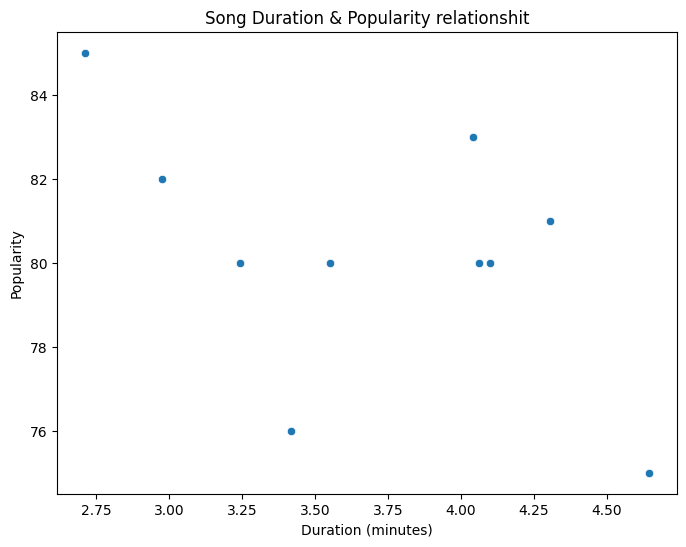

In [35]:
import matplotlib.pyplot as plt

# Track name, popularity and duration_ms filter
tracks_data = {
    'track_name': [track['name'] for track in top_tracks['tracks'][:10]],
    'popularity': [track['popularity'] for track in top_tracks['tracks'][:10]],
    'duration_ms': [track['duration_ms'] for track in top_tracks['tracks'][:10]]
}

# Convert dictionary to Pandas DataFrame
df_tracks = pd.DataFrame(tracks_data)

# Duration from milliseconds to minutes
df_tracks['duration_min'] = df_tracks['duration_ms'] / 60000

plt.figure(figsize=(8, 6))
sns.scatterplot(x='duration_min', y='popularity', data=df_tracks)

plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.title('Song Duration & Popularity relationshit')

plt.show()